In [1]:
import plotly as plt
import plotly.express as px
import json
from urllib.request import urlopen
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import networkx as nx

county_bound = gpd.read_file('bdry_counties.gpkg')
census_data = pd.read_csv('census_data.csv')
case_data = pd.read_csv('allmn.csv')

ModuleNotFoundError: No module named 'geopandas'

In [3]:
mean_hi = census_data[['DP03_0087E', 'county']]
#total households on food stamps DP03_0074E
#mean family income DP03_0087E

In [4]:
sentance_data = case_data[['confine', 'time', 'county', 'race']]
sentance_data['over/under max time'] = sentance_data['confine']-sentance_data['time']
#confine is in months

<ipython-input-4-31072c04cbaf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentance_data['over/under max time'] = sentance_data['confine']-sentance_data['time']


In [5]:
sentance_data

,confine,time,county,race,over/under max time
0,0.00,12.03,42,2,-12.03
1,12.03,12.03,2,2,0.00
2,12.00,12.03,2,1,-0.03
3,0.00,12.03,3,1,-12.03
4,0.00,12.03,4,1,-12.03
...,...,...,...,...,...
294462,129.00,134.00,69,4,-5.00
294463,86.00,134.00,69,1,-48.00
294464,98.00,134.00,86,2,-36.00
294465,94.00,158.00,69,1,-64.00


In [6]:
#find na values
na_valus = sentance_data[sentance_data['time'].isna()==True].index
#drop na values
cleaned_sentance_data=sentance_data.drop(na_valus)
#test to see if it worked
sum(cleaned_sentance_data['time'].isna())

0

In [7]:
sentance_data

,confine,time,county,race,over/under max time
0,0.00,12.03,42,2,-12.03
1,12.03,12.03,2,2,0.00
2,12.00,12.03,2,1,-0.03
3,0.00,12.03,3,1,-12.03
4,0.00,12.03,4,1,-12.03
...,...,...,...,...,...
294462,129.00,134.00,69,4,-5.00
294463,86.00,134.00,69,1,-48.00
294464,98.00,134.00,86,2,-36.00
294465,94.00,158.00,69,1,-64.00


In [28]:

income_sentance_data = mean_hi.merge(sentance_data, on='county')
#make it readable
income_sentance_data = income_sentance_data.rename(columns={'DP03_0087E': 'mean family income'})

income_sentance_data['county'].nunique()
#income_sentance_data.groupby('county')['over/under max time'].mean()

44

In [15]:
county_bound = county_bound.rename(columns={'COUNTY_FIP': 'county'})
county_bound["county"] = pd.to_numeric(county_bound["county"])

county_bound["average over/under rec sent"] = income_sentance_data.groupby('county')['over/under max time'].mean()

county_bound

,COUNTY_NAM,COUNTY_COD,county,COUNTY_GNI,ATP_CODE,SHAPE_Leng,SHAPE_Area,geometry,average over/under rec sent
0,Red Lake,63,125,659508,2,160725.772889,1.121199e+09,"POLYGON ((254267.489 5317428.819, 254535.947 5...",NaN
1,Hennepin,27,53,659472,M,189829.833881,1.570490e+09,"POLYGON ((460790.980 5009684.501, 460860.420 5...",-6.150128
2,Stearns,73,145,659517,3,280898.930397,3.598882e+09,"POLYGON ((333638.162 5071100.279, 333638.183 5...",NaN
3,Sherburne,71,141,659515,3,163652.509384,1.166967e+09,"POLYGON ((419160.274 5045580.789, 419800.700 5...",-3.918690
4,Murray,51,101,659496,8,173803.047160,1.864170e+09,"POLYGON ((302069.198 4857932.176, 302069.141 4...",NaN
...,...,...,...,...,...,...,...,...,...
82,Norman,54,107,659499,2,247097.098586,2.272880e+09,"POLYGON ((223954.745 5267125.892, 225542.470 5...",NaN
83,Goodhue,25,49,659470,6,233063.117780,2.020004e+09,"POLYGON ((530126.980 4941870.820, 530114.720 4...",-7.586180
84,Dakota,19,37,659464,M,188056.213349,1.517535e+09,"POLYGON ((492821.770 4974434.601, 492823.170 4...",NaN
85,Faribault,22,43,659467,7,173942.500141,1.868579e+09,"POLYGON ((407752.220 4855630.841, 409291.210 4...",-8.159213


In [9]:
county_bound = county_bound.rename(columns={'COUNTY_FIP': 'county'})
county_bound["county"] = pd.to_numeric(county_bound["county"])

bound_income_sentance_data = county_bound.merge(income_sentance_data, on='county')

In [10]:
bound_income_sentance_data

,COUNTY_NAM,COUNTY_COD,county,COUNTY_GNI,ATP_CODE,SHAPE_Leng,SHAPE_Area,geometry,mean family income,confine,time,race,over/under max time
0,Hennepin,27,53,659472,M,189829.833881,1.570490e+09,"POLYGON ((460790.980 5009684.501, 460860.420 5...",139489,12.03,33.0,1,-20.97
1,Hennepin,27,53,659472,M,189829.833881,1.570490e+09,"POLYGON ((460790.980 5009684.501, 460860.420 5...",139489,50.00,60.0,1,-10.00
2,Hennepin,27,53,659472,M,189829.833881,1.570490e+09,"POLYGON ((460790.980 5009684.501, 460860.420 5...",139489,68.00,60.0,2,8.00
3,Hennepin,27,53,659472,M,189829.833881,1.570490e+09,"POLYGON ((460790.980 5009684.501, 460860.420 5...",139489,30.00,60.0,4,-30.00
4,Hennepin,27,53,659472,M,189829.833881,1.570490e+09,"POLYGON ((460790.980 5009684.501, 460860.420 5...",139489,0.00,23.0,1,-23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164354,Faribault,22,43,659467,7,173942.500141,1.868579e+09,"POLYGON ((407752.220 4855630.841, 409291.210 4...",80794,68.00,68.0,1,0.00
164355,Faribault,22,43,659467,7,173942.500141,1.868579e+09,"POLYGON ((407752.220 4855630.841, 409291.210 4...",80794,54.00,58.0,1,-4.00
164356,Faribault,22,43,659467,7,173942.500141,1.868579e+09,"POLYGON ((407752.220 4855630.841, 409291.210 4...",80794,48.00,68.0,1,-20.00
164357,Faribault,22,43,659467,7,173942.500141,1.868579e+09,"POLYGON ((407752.220 4855630.841, 409291.210 4...",80794,81.00,86.0,1,-5.00


<AxesSubplot:>

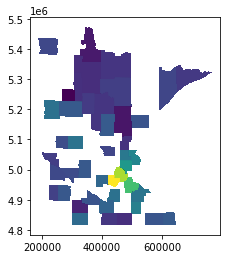

In [10]:
bound_income_sentance_data.plot(column='mean family income')

In [ ]:
bound_income_sentance_data.plot(column='mean family income', cmap='Blues', legend=True, )

In [ ]:
sum(bound_income_sentance_data['mean family income'].isna())

In [ ]:
bound_income_sentance_data.plot()

In [ ]:
fig, ax = plt.subplots(1, figsize =(16, 8))
  
bound_income_sentance_data.plot(ax = ax)
bound_income_sentance_data.plot(ax = ax, column ='mean family income', cmap ='Reds',
           edgecolors ='black')
fig.show()

In [16]:
from gerrychain import Partition, Graph
graph = Graph.from_geodataframe(county_bound)

/Users/owenkoppe/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/gerrychain/graph/graph.py:272: UserWarning: NA values found in column average over/under rec sent!
  warnings.warn("NA values found in column {}!".format(column))


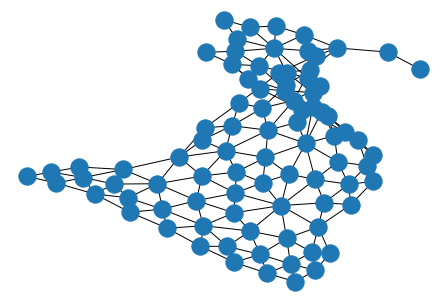

In [25]:
nx.draw(graph)

In [26]:
nx.write_adjlist(graph, "adjlist.csv")